## Homework Set 3

In [1]:
## MP 573 HW3
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal, ndimage, misc
from skimage.data import shepp_logan_phantom

font = {'weight' : 'normal',
        'size'   : 20}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Problem 1

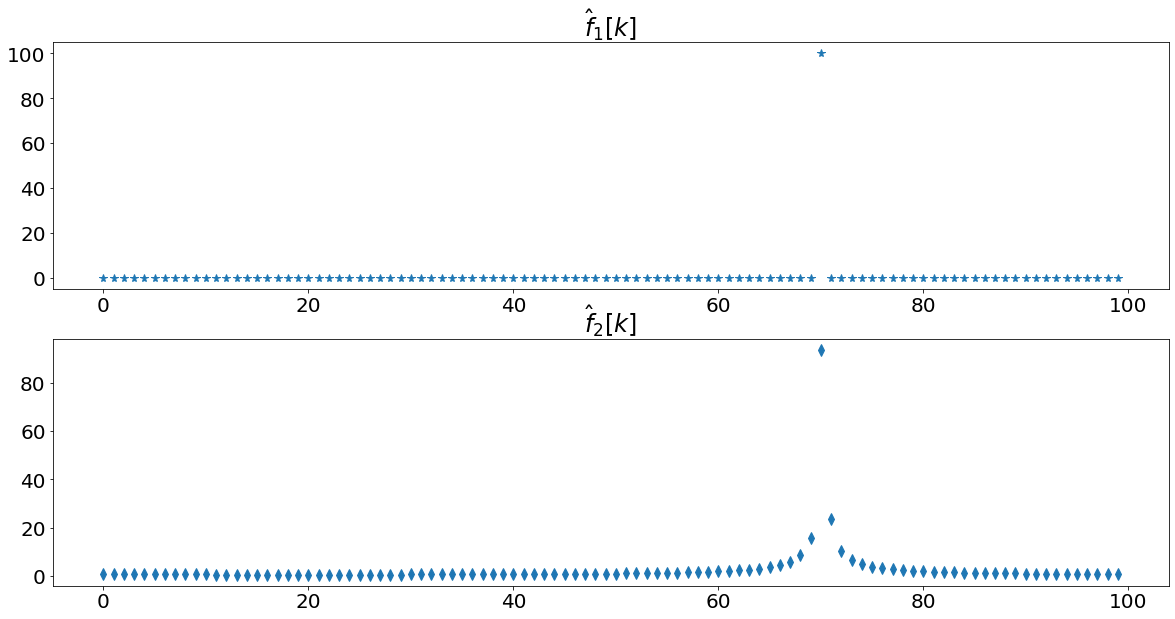

In [2]:
# Simulate sampled complex exponential signals
xmax = 20 # In parts B, C, xmax is set to 80 and 100, resp
dx = 0.2
x = np.arange(0,xmax,dx)

# Create a discrete signal as a function of x: a complex exponential with
# frequency 1.00, sampled at the locations described in x. Plot the 
# magnitude of the DFT of this signal. 
freq1 = 1.00
f1 = np.exp(1j*2*np.pi*freq1*x)
fhat1 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f1)))
plt.figure(figsize=(20,10))
plt.rc('font', **font)
plt.subplot(2,1,1)
plt.plot(abs(fhat1),'*',markersize=8);
plt.title('$\hat{f}_1[k]$')

# Create a discrete signal as a function of x: a complex exponential with
# frequency 1.01, sampled at the locations described in x. Plot the 
# magnitude of the DFT of this signal.
freq2 = 1.01
f2 = np.exp(1j*2*np.pi*freq2*x)
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2)))
plt.subplot(2,1,2)
plt.plot(abs(fhat2),'d',markersize=8);
plt.title('$\hat{f}_2[k]$');



## Problem 2A

In [3]:
# Let's run these versions of fft with shifts
f = np.ones(11)
fhat1 = np.fft.fft(f)
fhat2 = np.fft.fftshift(np.fft.fft(f))
fhat3 = np.fft.ifftshift(np.fft.fft(f))


# Let's print the real-part for simplicity, 
# since these signals should be real-valued
print('fhat1 = ')
print(np.real(fhat1))
print('fhat2 = ')
print(np.real(fhat2))
print('fhat3 = ')
print(np.real(fhat3))



fhat1 = 
[11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
fhat2 = 
[ 0.  0.  0.  0.  0. 11.  0.  0.  0.  0.  0.]
fhat3 = 
[ 0.  0.  0.  0.  0.  0. 11.  0.  0.  0.  0.]


## Problem 2B

The following code was meant to filter our Shepp-Logan phantom image using the Fourier-domain filter hhat, which should be a low-pass filter with a Gaussian profile. This filter should result in an image that is a smoothed version of the input image, and where the phase is essentially zero everywhere. However, something went wrong and our resulting output image g does not make any sense. Please fix the code provided above by adding fftshift and/or ifftshift as needed, so it accomplishes the desired purpose. 

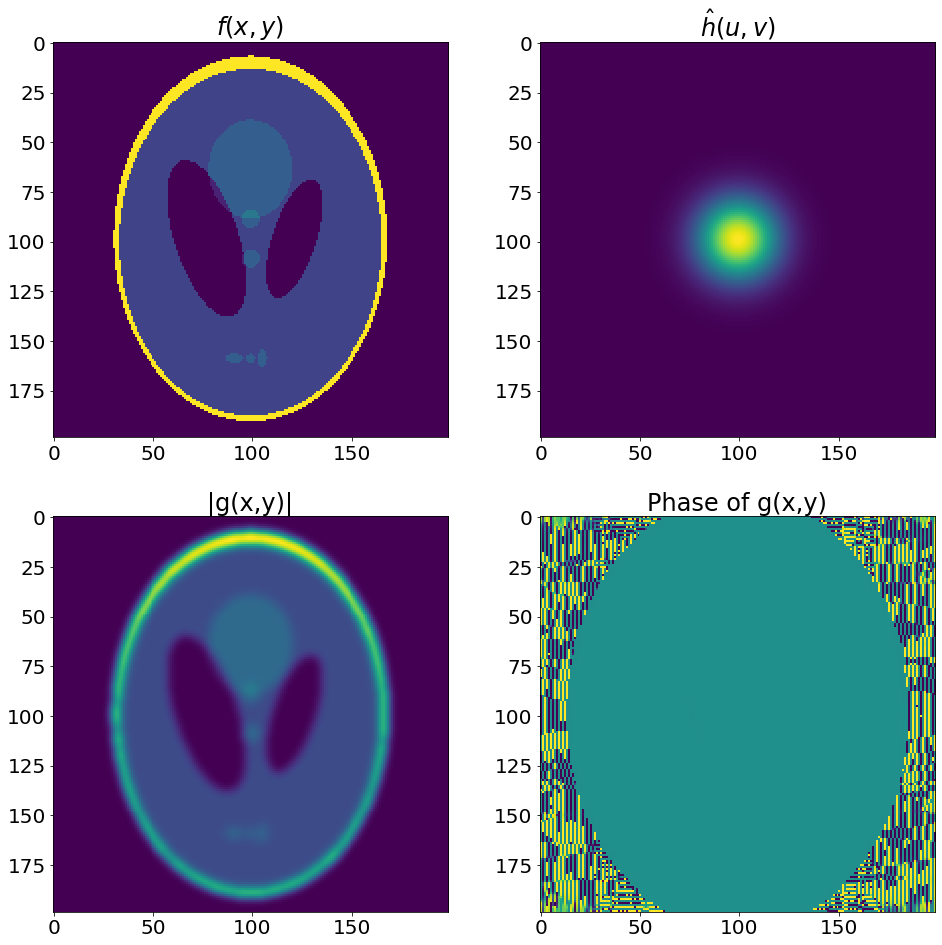

In [4]:
# Create a Shepp-Logan phantom image
f = shepp_logan_phantom()
f = f[2::2,2::2]
n = f.shape[1]
fhat = np.fft.fftn(f)

# Solution: Let's add fftshift and ifftshift so the DFT behaves as expected
fhat = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(f))) 

V,U = np.mgrid[10:-10:(1j*n), -10:10:(1j*n)]
hhat = np.exp(-(U**2 + V**2)/4)

# Show the original image f
plt.figure(figsize=(16,16))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.imshow(abs(f))
plt.title('$f(x,y)$');

# Show the filter in DFT space
plt.subplot(2,2,2)
plt.imshow(abs(hhat))
plt.title('$\hat{h}(u,v)$');

ghat = fhat*hhat
g = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(ghat)))

# Show the filtered image g (magnitude)
plt.subplot(2,2,3)
plt.imshow(abs(g))
plt.title('|g(x,y)|');

# Show the filtered image g (phase)
plt.subplot(2,2,4)
plt.imshow(np.angle(g))
plt.title('Phase of g(x,y)');




## Problem 3: zero-padded DFT

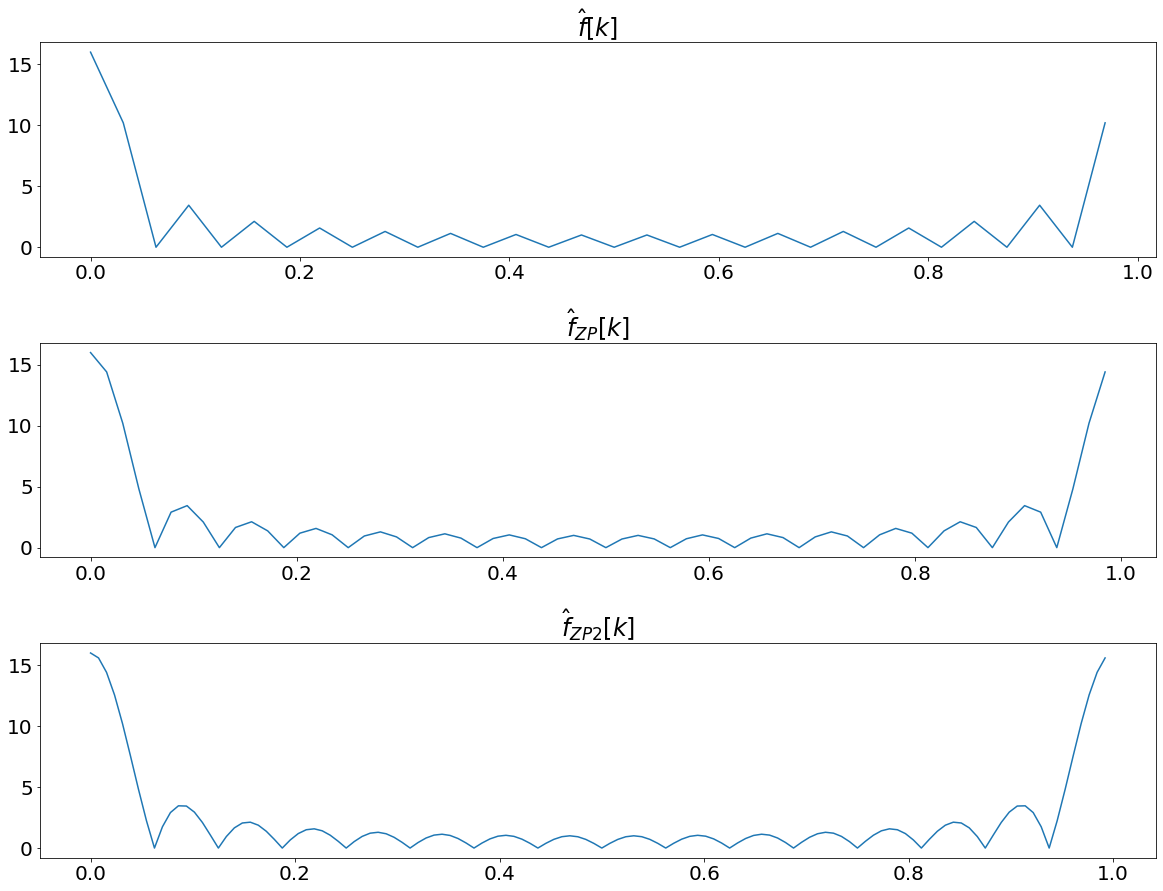

In [5]:
# Create a signal and zero pad it progressively a couple times
f = np.concatenate((np.ones(16),np.zeros(16)))
fZP = np.concatenate((f,np.zeros(32)))
fZP2 = np.concatenate((fZP,np.zeros(64)))

# Now calculate the corresponding DFTs
# Also calculate the corresponding discrete frequencies
k1 = np.arange(0,1,1/len(f))
fhat = np.fft.fft(f)
k2 = np.arange(0,1,1/len(fZP))
fZPhat = np.fft.fft(fZP)
k3 = np.arange(0,1,1/len(fZP2))
fZP2hat = np.fft.fft(fZP2)

# Show the first dft
plt.figure(figsize=(20,15))
plt.rc('font', **font)
plt.subplots_adjust(hspace=0.4)
plt.subplot(3,1,1)
plt.plot(k1,abs(fhat));
plt.title('$\hat{f}[k]$')

# Show the second (zero padded) dft
plt.subplot(3,1,2)
plt.plot(k2,abs(fZPhat));
plt.title('$\hat{f}_{ZP}[k]$')

# Show the third (more zero padded) dft
plt.subplot(3,1,3)
plt.plot(k3,abs(fZP2hat));
plt.title('$\hat{f}_{ZP2}[k]$');


## Problem 4: Zero-padding in 2D DFT space


Ratio of max pixel amplitudes before vs after zero padding: 
24.66199358317417


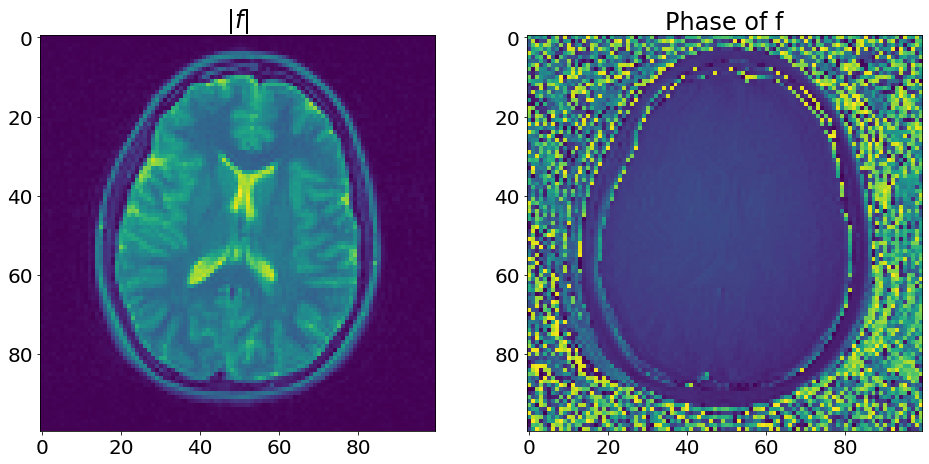

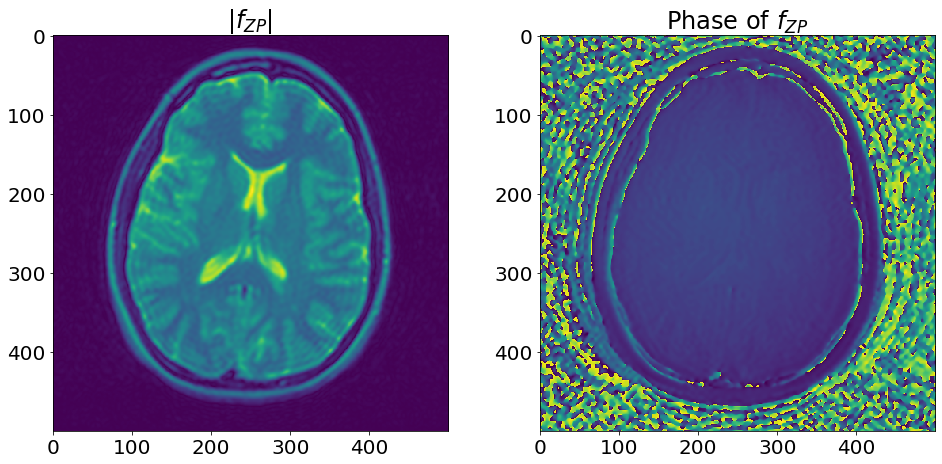

In [6]:
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_fourier.mat')
mat_contents = sio.loadmat(mat_fname)
fhat = mat_contents['dataLR']

# To-do: run 2D iFFT on fhat (including fftshift and ifftshift as needed)
f = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(fhat)))
# Show the image
plt.figure(figsize=(16,16))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.imshow(abs(f));
plt.title('$|f|$')
plt.subplot(2,2,2)
plt.imshow(np.angle(f));
plt.title('Phase of f')


# To-do: Zero-pad fhat by placing it in the middle of a 500x500 zeros array
# Then run 2D iFFT on the zero-padded array, as above
fhatZP = np.zeros((500,500)) + 1j*np.zeros((500,500))
fhatZP[200:300,200:300] = fhat
# To-do: run 2D iFFT on fhat (including fftshift and ifftshift as needed)
fZP = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(fhatZP)))
# To-do: Show the image
plt.figure(figsize=(16,16))
plt.rc('font', **font)
plt.subplot(2,2,3)
plt.imshow(abs(fZP));
plt.title('$|f_{ZP}|$')
plt.subplot(2,2,4)
plt.imshow(np.angle(fZP));
plt.title('Phase of $f_{ZP}$');

print('Ratio of max pixel amplitudes before vs after zero padding: ') 
print(np.max(abs(f))/np.max(abs(fZP)))

